In [1]:
from pprint import pprint
import pandas as pd
import os

import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import display
%pprint

Pretty printing has been turned OFF


In [2]:
file_name = "/Users/rohanjain/Desktop/3rd_Year/Individual Project/Crambor/hpl/analysis/results/HPCG/Hamilton/results1/output.out"
data = None 
with open(file_name, "r") as file: 
    data = file.read()

data = data.split("BRUHBRUHBRUH\\n\\nBRUHBRUHBRUHBRUHBRUH")[1:]

/Users/rohanjain/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rohanjain/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


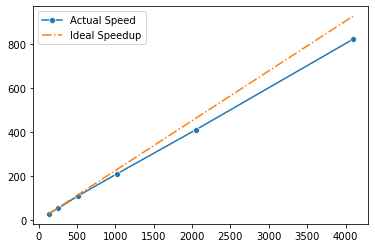

In [3]:

num_nodes = []
gflops_all = []
all_times = []

for file in data: 
    num_distributed_processes = None 
    results_gflops = None 
    temp_time = None

    file = file.splitlines()

    for line in file: 

        if "Distributed Processes" in line: 
            num_distributed_processes = int(line[24:].strip())
            # print(num_distributed_processes)
        
        if "HPCG result is VALID with a GFLOP/s rating of:" in line: 
            results_gflops = float(line.strip()[47:].strip())

        if "execution time (sec) is:" in line: 
            temp_time = float(line[49:].strip())
            
    num_nodes.append(num_distributed_processes)
    gflops_all.append(results_gflops)
    all_times.append(temp_time)


i = num_nodes.index(128)

node1_gflops = gflops_all[i]
ideal_speedup = [node1_gflops * value/128 for value in num_nodes]


sns.lineplot(num_nodes, gflops_all, label="Actual Speed", marker='o')
sns.lineplot(num_nodes, ideal_speedup, label="Ideal Speedup", linestyle="dashdot")
plt.show()

In [ ]:
num_nodes, gflops_all

([128, 256, 512, 1024, 2048, 4096],
 [28.9719, 55.216, 110.672, 211.937, 411.232, 822.33])

In [7]:
num_nodes = [1024,512,256,128,2048,]
gflops_all = [296.942,153.102,77.0579,38.7726,570.542,]
all_times = [6193.77,6130.5,6081.73,6047.34,5447.22,]

In [9]:
# df = pd.DataFrame(data={"cores": num_nodes, "gflops_all": gflops_all, "execution_time": all_times})
# df["Nodes"] = df["cores"]/128
# df["effeciency"] = df["gflops_all"]/28.9719
# df


df = pd.DataFrame(data={"cores": num_nodes, "gflops_all": gflops_all, "execution_time": all_times})
df["Nodes"] = df["cores"]/128
df["effeciency"] = df["gflops_all"]/38.7726
df.sort_values(by="cores")

,cores,gflops_all,execution_time,Nodes,effeciency
3,128,38.7726,6047.34,1.0,1.000000
2,256,77.0579,6081.73,2.0,1.987432
1,512,153.1020,6130.50,4.0,3.948716
0,1024,296.9420,6193.77,8.0,7.658553
4,2048,570.5420,5447.22,16.0,14.715082


[38.7726, 77.5452, 155.0904, 310.1808, 620.3616]
[38.7726, 77.0579, 153.102, 296.942, 570.542]
[128, 256, 512, 1024, 2048]


/Users/rohanjain/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rohanjain/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


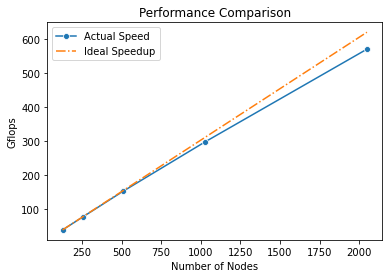

In [6]:
def plot_graph(num_nodes, gflops, node1corecount = 128): 
    
# For the cloud results

    i = num_nodes.index(node1corecount)

    node1_gflops = gflops[i]
    ideal_speedup = [(node1_gflops * value)/node1corecount for value in num_nodes]

    print(sorted(ideal_speedup))
    print(sorted(gflops))
    print(sorted(num_nodes))

    fig, ax = plt.subplots()

    sns.lineplot(num_nodes, gflops, label="Actual Speed", marker='o', ax=ax)
    sns.lineplot(num_nodes, ideal_speedup, label="Ideal Speedup", linestyle="dashdot", ax=ax)

    ax.set_xlabel('Number of Nodes')
    ax.set_ylabel('Gflops')
    ax.set_title('Performance Comparison')

    plt.legend()
    plt.show()

    # max_results["speedup"] = max_results["Gflops"]/(max_results[max_results["Nodes"] == 1.0]["Gflops"].values[0])
    # display(max_results)

plot_graph(num_nodes, gflops_all)

46